In [2]:
import random
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from instancePDSVRP import instancePDSVRP
import copy
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import heuristic as h
import utilities as u

In [2]:
# Parameter ranges
param_ranges = {
    'num_customers': (10, 100),
    'grid_size': (20, 40),
    'num_drones': (1, 20),
    'battery_endurance': (0.25, 1.0),
    'cost_ratio': (10.0, 50.0)
}

# Constants
constants = {
    'truck_speed': 30.0,
    'drone_speed': 40.0,
    'truck_capacity': 1300.0,
    'drone_capacity': 2.27,
    'drone_unit_cost': 0.03,
    'work_time_limit': 8.0
}

num_instances = 300

Method to generate instances with given features

In [3]:
def generate_instance(num_custumers, grid_size, num_drones, battery_endurance, cost_ratio):
    custumers = []
    
    depot = [{
        'x': random.uniform(0, grid_size),
        'y': random.uniform(0, grid_size),
        'demand': 0.00
    }]
    
    custumers = [
            {
                'x': random.uniform(0, grid_size),
                'y': random.uniform(0, grid_size),
                'demand': random.uniform(0, 2.27) if np.random.rand() < 0.86 else random.uniform(2.27, 68) 
            }
            for _ in range(num_custumers)
        ]
    
    all_entities  = depot + custumers
    
    header = (
        f"NUM DRONES,{num_drones}\n"
        f"NUM TRUCKS,{10}\n"
        f"TRUCK CAP,{constants['truck_capacity']}\n"
        f"DRONE CAP,{constants['drone_capacity']}\n"
        f"TRUCK SPEED,{constants['truck_speed']}\n"
        f"DRONE SPEED,{constants['drone_speed']}\n"
        f"DRONE ENDURANCE,{battery_endurance:.2f}\n"
        f"DRONE TIME LIMIT,{constants['work_time_limit']}\n"
        f"TRUCK TIME LIMIT,{constants['work_time_limit']}\n"
        f"TRUCK UNIT COST,{cost_ratio * constants['drone_unit_cost']:.2f}\n"
        f"DRONE UNIT COST,{constants['drone_unit_cost']}\n"
    )
    customer_lines = "\n".join(
        f"{i}\t{customer['x']:.2f}\t{customer['y']:.2f}\t{customer['demand']:.2f}"
        for i, customer in enumerate(all_entities)
    )
    return header + customer_lines

Dataset creation

In [7]:
instances = []
params = []

for _ in range(num_instances):
    int_params = {
        'num_custumers': random.randint(*param_ranges['num_customers']),
        'grid_size': random.randint(*param_ranges['grid_size']),
        'num_drones': random.randint(*param_ranges['num_drones']),
        'battery_endurance': random.uniform(*param_ranges['battery_endurance']),
        'cost_ratio': random.uniform(*param_ranges['cost_ratio']),
    }
    params.append(int_params)
    instances.append(generate_instance(int_params['num_custumers'], int_params['grid_size'], int_params['num_drones'], int_params['battery_endurance'], int_params['cost_ratio']))

df = pd.DataFrame(params)

In [8]:
for index, instance in enumerate(instances):
    with open('./instances/generated_instances/'+ str(index) + '-r-r' '.txt', 'w') as file:
        file.write(str(instance))

Computation of the dependent variable

In [9]:
def compute_cost_saving(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb):    
    instance_no_drones = copy.deepcopy(instance)
    instance_no_drones.D = 0
        
    sol_drones = h.SISSRs(instance, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb)
    sol_no_drones = h.SISSRs(instance_no_drones, sigma, c_average_removed, L_max, w1, w2, w3, w4, w5, gamma, n_nearest, delta, epsilon, iter_imp, iter_max, p_min, p_max, max_unfeasible_swaps_perturb)
    
    cost_with_drones = u.cost(instance, sol_drones)
    cost_without_drones = u.cost(instance_no_drones, sol_no_drones)
    
    cost_saving = 100 * (cost_without_drones - cost_with_drones) / cost_without_drones
    return cost_saving

In [10]:
cost_savings = []

instances_name_files = []
for index in range(num_instances):
    instances_name_files.append(str(index) + "-r-r.txt")
            
for name_file_instance in instances_name_files:
    instance = instancePDSVRP("instances/generated_instances/" + name_file_instance)
    print("instance: ", name_file_instance)
    p_min = (int)(min(3, instance.N * 0.1))
    p_max = (int)(instance.N * 0.1)
    cost_savings.append(compute_cost_saving(instance, 0.3, instance.N * 0.15, instance.N * 0.15, 5,1,1,2,2, 0.1, 20, 0.1, 0.999975, 30, 300, p_min, p_max, 9))
    
df['cost_savings'] = cost_savings

instance:  0-r-r.txt
instance:  1-r-r.txt
instance:  2-r-r.txt
instance:  3-r-r.txt
instance:  4-r-r.txt
instance:  5-r-r.txt
instance:  6-r-r.txt
instance:  7-r-r.txt
instance:  8-r-r.txt
instance:  9-r-r.txt
instance:  10-r-r.txt
instance:  11-r-r.txt
instance:  12-r-r.txt
instance:  13-r-r.txt
instance:  14-r-r.txt
instance:  15-r-r.txt
instance:  16-r-r.txt
instance:  17-r-r.txt
instance:  18-r-r.txt
instance:  19-r-r.txt
instance:  20-r-r.txt
instance:  21-r-r.txt
instance:  22-r-r.txt
instance:  23-r-r.txt
instance:  24-r-r.txt
instance:  25-r-r.txt
instance:  26-r-r.txt
instance:  27-r-r.txt
instance:  28-r-r.txt
instance:  29-r-r.txt
instance:  30-r-r.txt
instance:  31-r-r.txt
instance:  32-r-r.txt
instance:  33-r-r.txt
instance:  34-r-r.txt
instance:  35-r-r.txt
instance:  36-r-r.txt
instance:  37-r-r.txt
instance:  38-r-r.txt
instance:  39-r-r.txt
instance:  40-r-r.txt
instance:  41-r-r.txt
instance:  42-r-r.txt
instance:  43-r-r.txt
instance:  44-r-r.txt
instance:  45-r-r.tx

In [11]:
df.to_csv("results/sensitivity_analysis_results.csv")

,num_custumers,grid_size,num_drones,battery_endurance,cost_ratio,cost_savings
0,34,30,2,0.670213,29.653832,5.289746
1,45,26,10,0.634598,24.854729,13.631414
2,79,40,6,0.611454,21.935712,-6.842048
3,90,31,10,0.285441,47.315491,2.633973
4,65,22,11,0.525236,38.653466,7.843241
...,...,...,...,...,...,...
295,76,35,19,0.680244,11.919495,10.936199
296,56,30,6,0.664581,11.575663,4.269368
297,46,28,18,0.317289,26.944881,2.962360
298,17,27,15,0.669768,26.846223,23.770283


Model training

In [39]:
# Features
df = pd.read_csv("best_results/sensitivity_analysis_results.csv")
X = df[['num_custumers', 'grid_size', 'num_drones', 'battery_endurance', 'cost_ratio']]

# Target
y = df['cost_savings']

regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=9, random_state=42)

regressor.fit(X, y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=9, random_state=42)

Tree rapresentation

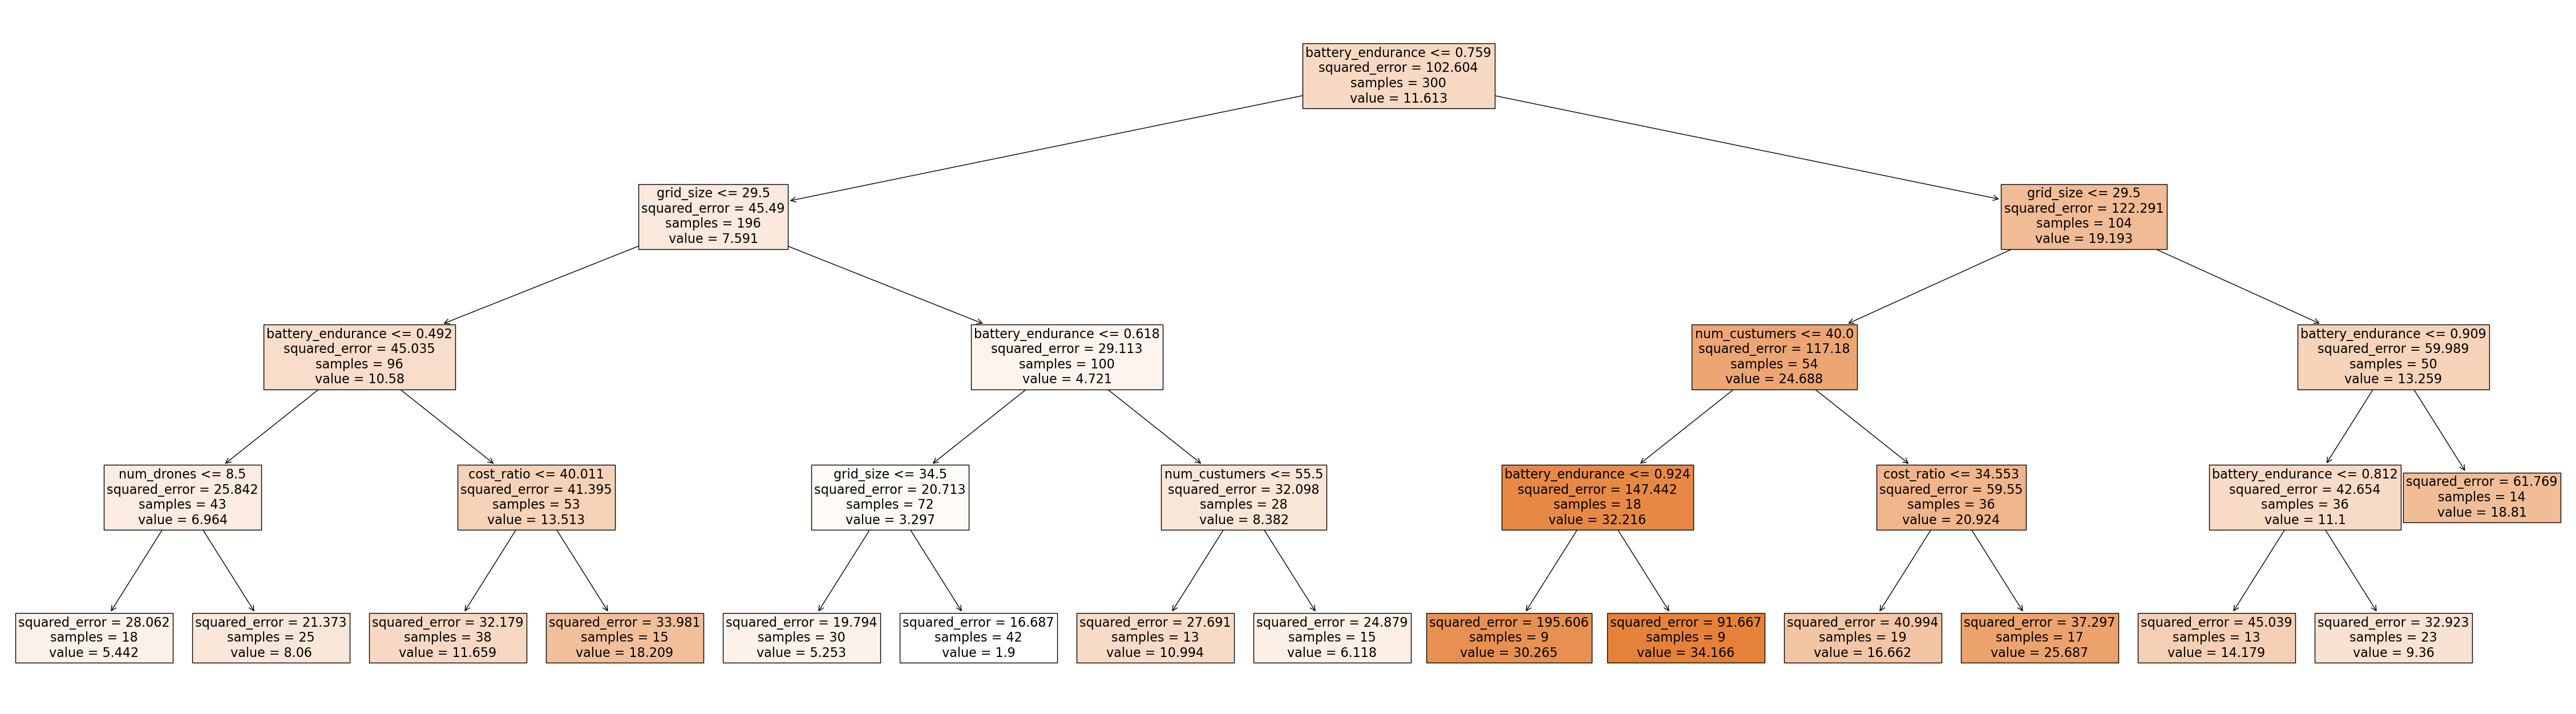

In [52]:
from sklearn import tree
plt.figure(figsize=(29*2,8*2))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
tree.plot_tree(regressor, fontsize=16, filled=True, feature_names=df.columns.values.tolist()[1:-1])
plt.show()

Plot feature importances

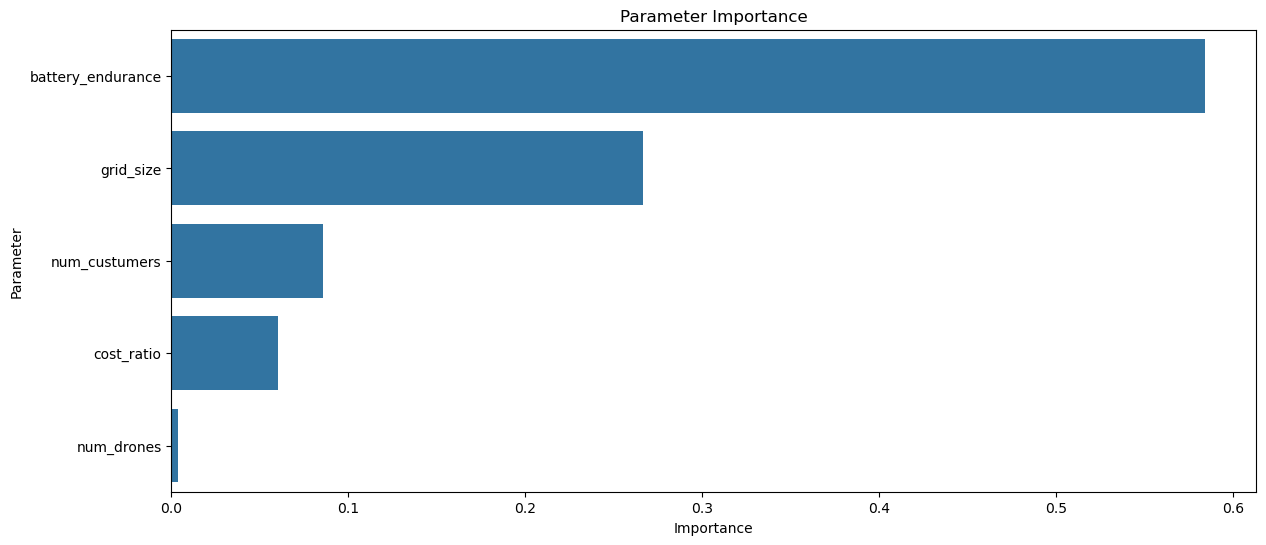

In [54]:
feature_importances = regressor.feature_importances_

importance_df = pd.DataFrame({
    'Parameter': X.columns,
    'Importance': feature_importances
})

importance_df['Importance'] = importance_df['Importance'] / importance_df['Importance'].sum()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=importance_df, x='Importance', y='Parameter')
plt.title('Parameter Importance')
plt.show()